In [19]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("shriyashjagtap/e-commerce-customer-for-behavior-analysis")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\sheet\.cache\kagglehub\datasets\shriyashjagtap\e-commerce-customer-for-behavior-analysis\versions\4


In [20]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, KBinsDiscretizer
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA

In [21]:
dataset=pd.read_csv('ecommerce_customer_data_custom_ratios.csv.zip')
dataset

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,46251,2020-09-08 09:38:32,Electronics,12,3,740,Credit Card,37,0.0,Christine Hernandez,37,Male,0
1,46251,2022-03-05 12:56:35,Home,468,4,2739,PayPal,37,0.0,Christine Hernandez,37,Male,0
2,46251,2022-05-23 18:18:01,Home,288,2,3196,PayPal,37,0.0,Christine Hernandez,37,Male,0
3,46251,2020-11-12 13:13:29,Clothing,196,1,3509,PayPal,37,0.0,Christine Hernandez,37,Male,0
4,13593,2020-11-27 17:55:11,Home,449,1,3452,Credit Card,49,0.0,James Grant,49,Female,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,33308,2023-08-10 13:39:06,Clothing,279,2,2187,PayPal,55,1.0,Michelle Flores,55,Male,1
249996,48835,2021-11-23 01:30:42,Home,27,1,3615,Credit Card,42,1.0,Jeremy Rush,42,Female,1
249997,21019,2020-07-02 14:04:48,Home,17,5,2466,Cash,41,0.0,Tina Craig,41,Male,0
249998,49234,2020-12-30 02:02:40,Books,398,2,3668,Crypto,34,0.0,Jennifer Cooper,34,Female,1


In [22]:
# 1. Handling Null Values
# Check for null values
print("Missing values before handling:\n", dataset.isnull().sum())

# Impute numerical features with mean and categorical with mode
numerical_features = dataset.select_dtypes(include=['int64', 'float64']).columns
categorical_features = dataset.select_dtypes(include=['object']).columns

# Imputation for numerical features
num_imputer = SimpleImputer(strategy='mean')
dataset[numerical_features] = num_imputer.fit_transform(dataset[numerical_features])

# Imputation for categorical features
cat_imputer = SimpleImputer(strategy='most_frequent')
dataset[categorical_features] = cat_imputer.fit_transform(dataset[categorical_features])

#display missing values after handling data 
print("Missing values after handling:\n", dataset.isnull().sum())
 


Missing values before handling:
 Customer ID                  0
Purchase Date                0
Product Category             0
Product Price                0
Quantity                     0
Total Purchase Amount        0
Payment Method               0
Customer Age                 0
Returns                  47596
Customer Name                0
Age                          0
Gender                       0
Churn                        0
dtype: int64
Missing values after handling:
 Customer ID              0
Purchase Date            0
Product Category         0
Product Price            0
Quantity                 0
Total Purchase Amount    0
Payment Method           0
Customer Age             0
Returns                  0
Customer Name            0
Age                      0
Gender                   0
Churn                    0
dtype: int64


In [23]:
# 2. Data Reduction
# a) Remove Low-Variance Features
# Variance threshold can be set lower based on the dataset (e.g., 0.01)
var_threshold = VarianceThreshold(threshold=0.01)
dataset_reduced = var_threshold.fit_transform(dataset[numerical_features])

# b) PCA for Dimensionality Reduction (optional, depending on dataset size and need)
# Set n_components based on the desired level of explained variance (e.g., 0.95 for 95%)
pca = PCA(n_components=0.95)
dataset_pca = pca.fit_transform(dataset_reduced)

In [24]:
# 3. Discretization
# Apply KBinsDiscretizer for continuous features (e.g., 4 bins with 'uniform' or 'quantile' strategy)
discretizer = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='uniform')
discretized_features = discretizer.fit_transform(dataset[numerical_features])

# Convert the discretized array back to a DataFrame and concatenate with original dataset
discretized_df = pd.DataFrame(discretized_features, columns=[f'{col}_bin' for col in numerical_features])
dataset = pd.concat([dataset, discretized_df], axis=1)

# Standardizing numerical features 
scaler = StandardScaler()
dataset[numerical_features] = scaler.fit_transform(dataset[numerical_features])


C:\Users\sheet\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\preprocessing\_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


DATA VISUALISATION

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# General settings
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))


<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

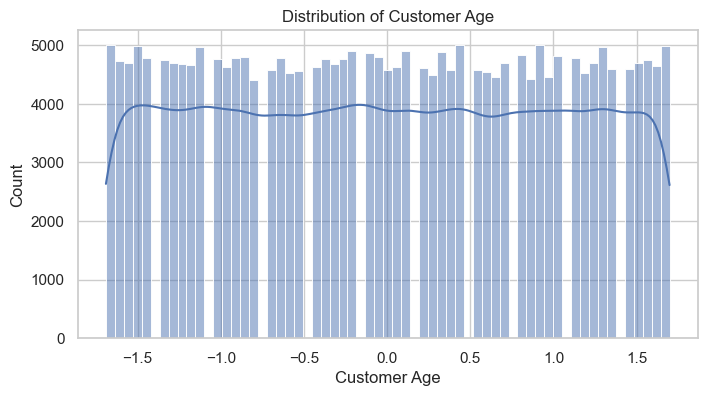

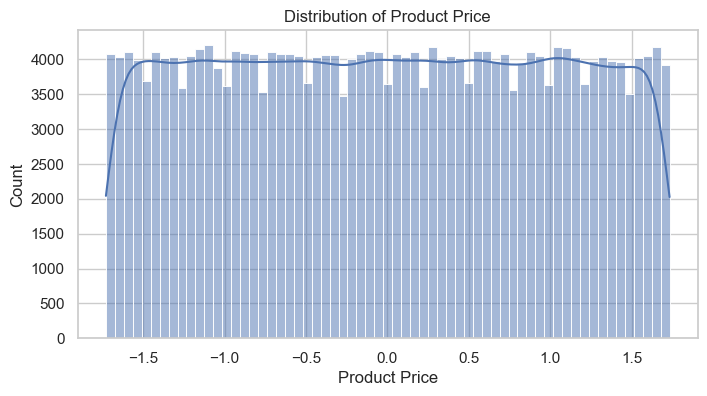

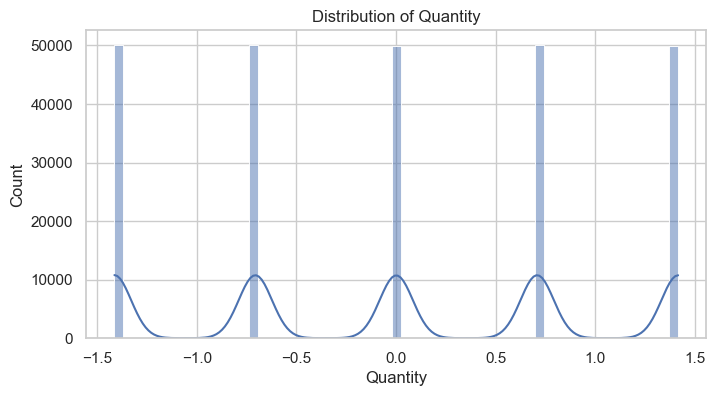

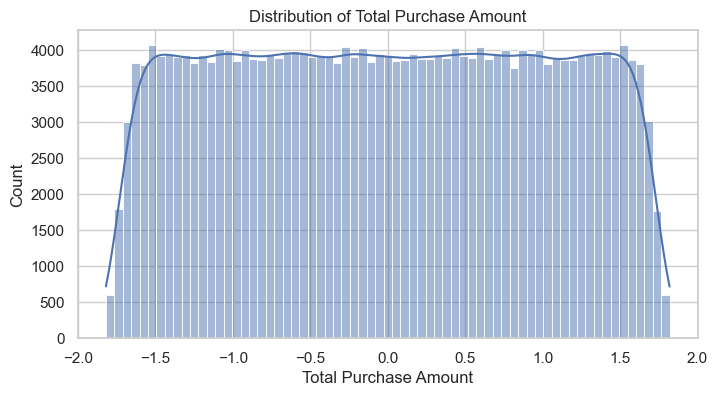

In [26]:
# 1. Histograms for numerical columns
numerical_cols = ['Customer Age', 'Product Price', 'Quantity', 'Total Purchase Amount']
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(dataset[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

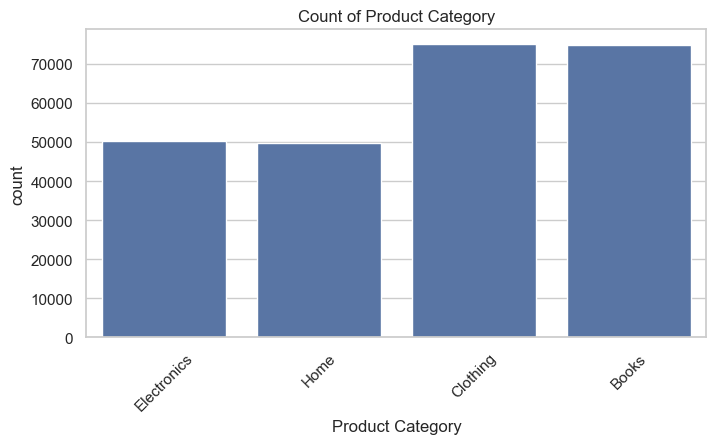

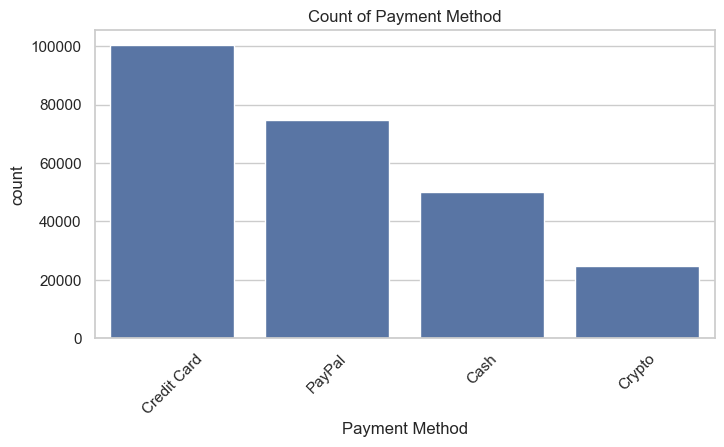

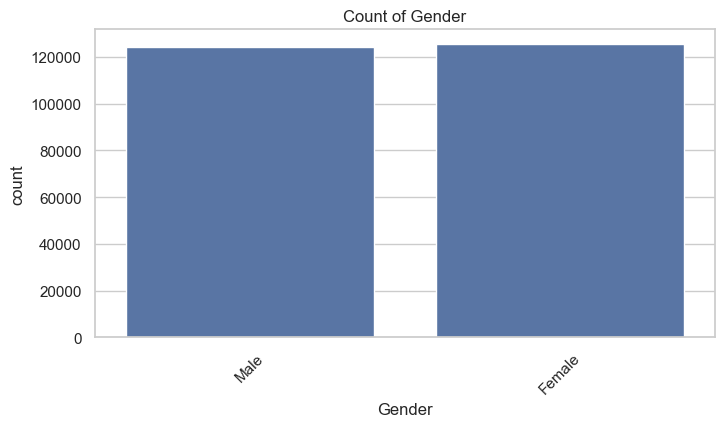

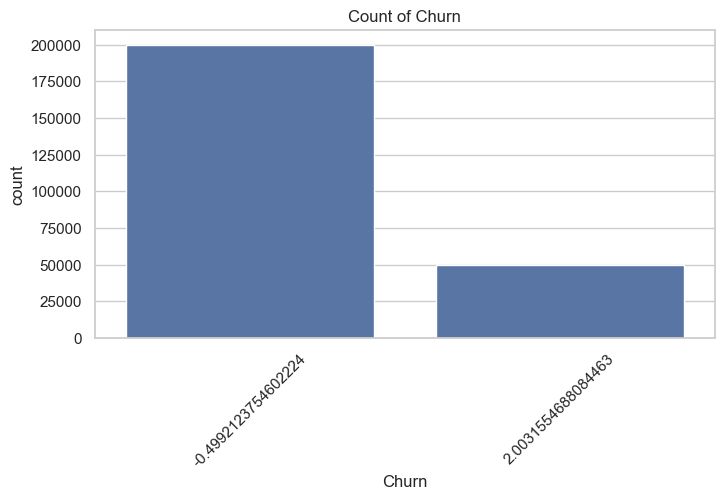

In [27]:
# 2. Bar plots for categorical columns
categorical_cols = ['Product Category', 'Payment Method', 'Gender', 'Churn']
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=dataset, x=col)
    plt.title(f'Count of {col}')
    plt.xticks(rotation=45)
    plt.show()

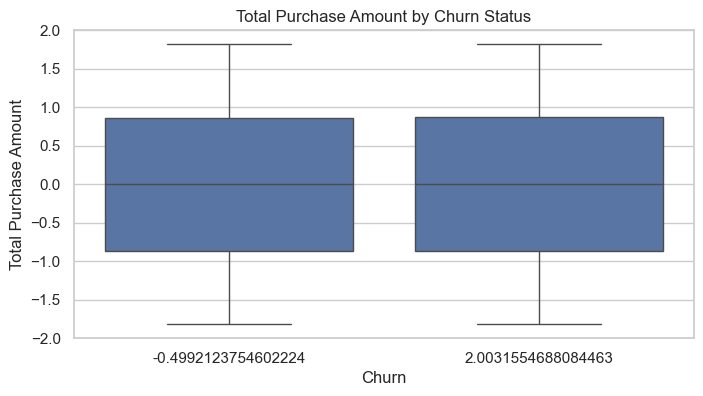

In [28]:
# 3. Customer churn vs. Total Purchase Amount
plt.figure(figsize=(8, 4))
sns.boxplot(data=dataset, x='Churn', y='Total Purchase Amount')
plt.title('Total Purchase Amount by Churn Status')
plt.show()

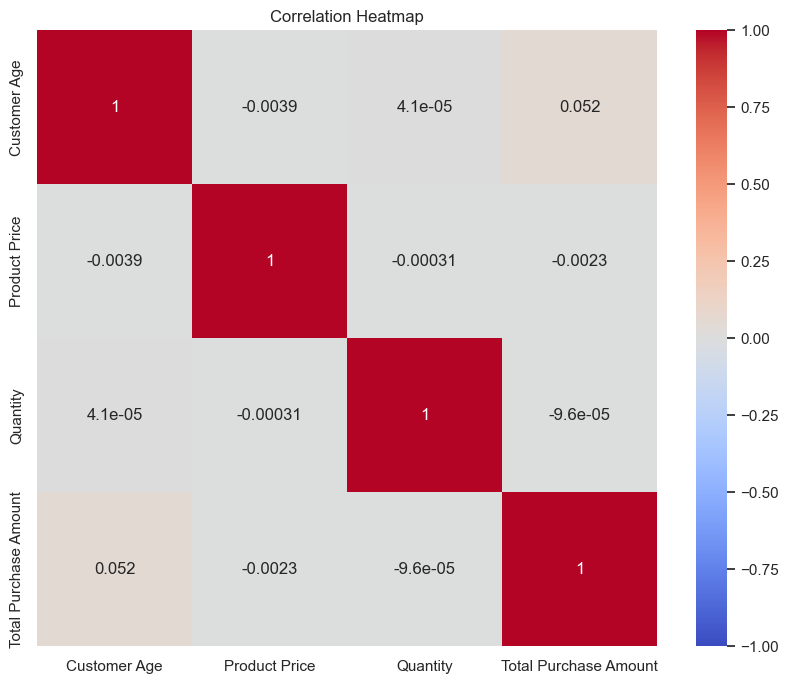

In [29]:
# 4. Correlation heatmap for numerical features
plt.figure(figsize=(10, 8))
sns.heatmap(dataset[numerical_cols].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()


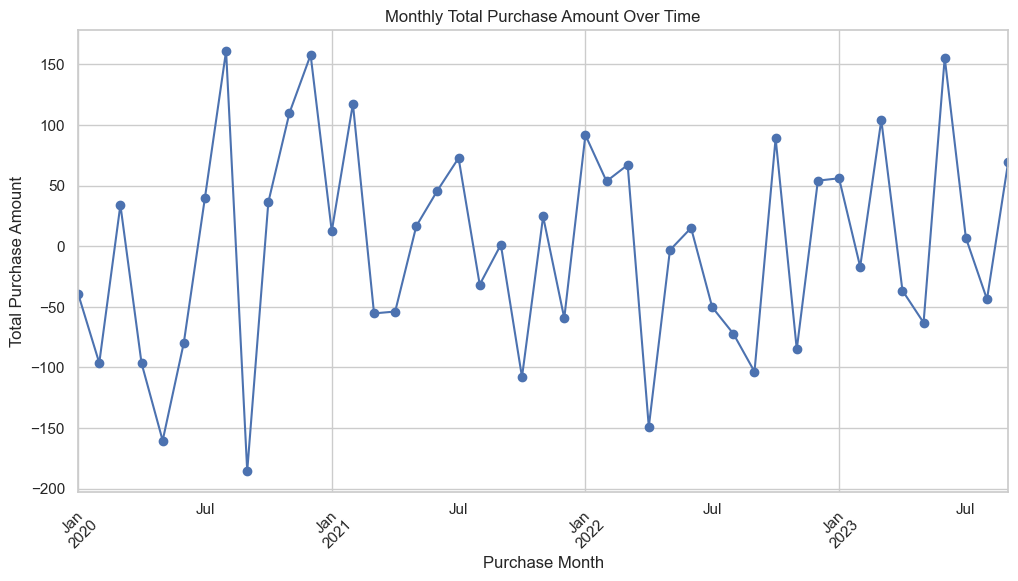

In [30]:
# 5. Time-based analysis
dataset['Purchase Date'] = pd.to_datetime(dataset['Purchase Date'])
dataset['Purchase Month'] = dataset['Purchase Date'].dt.to_period('M')
monthly_sales = dataset.groupby('Purchase Month')['Total Purchase Amount'].sum()

plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', marker='o')
plt.title('Monthly Total Purchase Amount Over Time')
plt.ylabel('Total Purchase Amount')
plt.xlabel('Purchase Month')
plt.xticks(rotation=45)
plt.show()

LOGISTIC REGRESSION MODEL 

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc


In [32]:
# Replace 2 with 1 in the 'Churn' column
dataset['Churn'] = dataset['Churn'].replace(2, 1)

# Convert 'Churn' column to integer if necessary
dataset['Churn'] = dataset['Churn'].astype(int)


# Drop non-numeric columns including 'Purchase Date' which may be causing the issue
X = dataset.drop(columns=['Customer ID', 'Customer Name', 'Purchase Date', 'Churn'])


# Drop 'Purchase Date' if it's still in the dataset
X = X.drop(columns=['Purchase Date'], errors='ignore')

# Convert 'Purchase Month' to integer representation (e.g., month number)
X['Purchase Month'] = X['Purchase Month'].dt.month

# One-hot encode categorical columns
X = pd.get_dummies(X, columns=['Product Category', 'Payment Method', 'Gender'], drop_first=True)

# Define target variable 'y' as the 'Churn' column
y = dataset['Churn']


# Split the data again
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression Model
logistic_model = LogisticRegression()
logistic_model.fit(X_train_scaled, y_train)

# Predictions and evaluation
y_pred = logistic_model.predict(X_test_scaled)

Accuracy of logistic regression model: 100.00%
Confusion Matrix:
 [[60052     0]
 [    0 14948]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     60052
           2       1.00      1.00      1.00     14948

    accuracy                           1.00     75000
   macro avg       1.00      1.00      1.00     75000
weighted avg       1.00      1.00      1.00     75000

ROC-AUC Score: 1.00


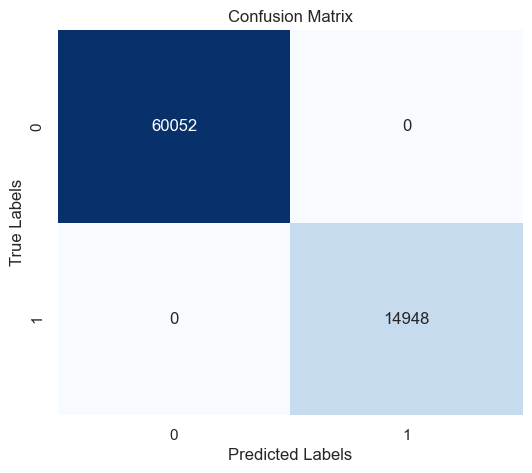

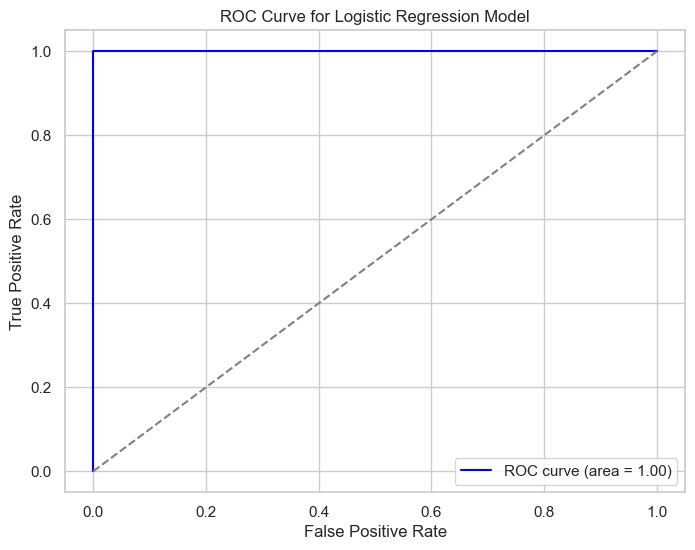

In [33]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of logistic regression model: {accuracy * 100:.2f}%")

# Display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

# ROC-AUC score
roc_auc = roc_auc_score(y_test, logistic_model.predict_proba(X_test_scaled)[:, 1])
print(f"ROC-AUC Score: {roc_auc:.2f}")

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


from sklearn.metrics import roc_curve, auc

# Ensure binary values in y_test by replacing 2s with 1s
y_test_binary = y_test.replace(2, 1)

# Generate probabilities for the positive class
y_probs = logistic_model.predict_proba(X_test_scaled)[:, 1]

# Compute ROC curve and AUC score
fpr, tpr, _ = roc_curve(y_test_binary, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression Model')
plt.legend()
plt.show()



Decision tree

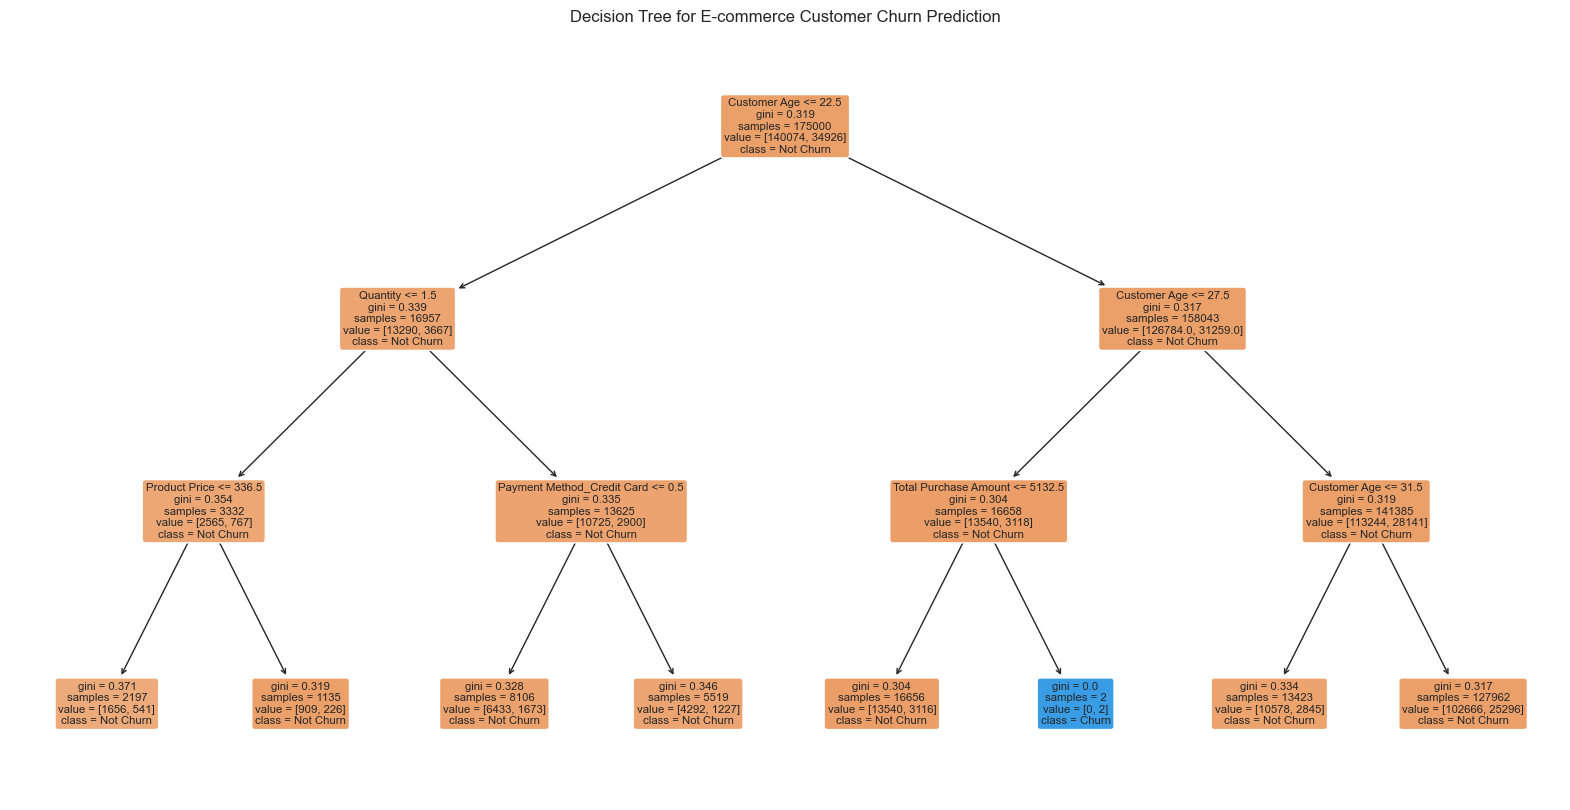

Accuracy of decision tree model: 80.06933333333333
Classification Report:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89     60052
           1       0.00      0.00      0.00     14948

    accuracy                           0.80     75000
   macro avg       0.40      0.50      0.44     75000
weighted avg       0.64      0.80      0.71     75000



C:\Users\sheet\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sheet\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sheet\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classificati

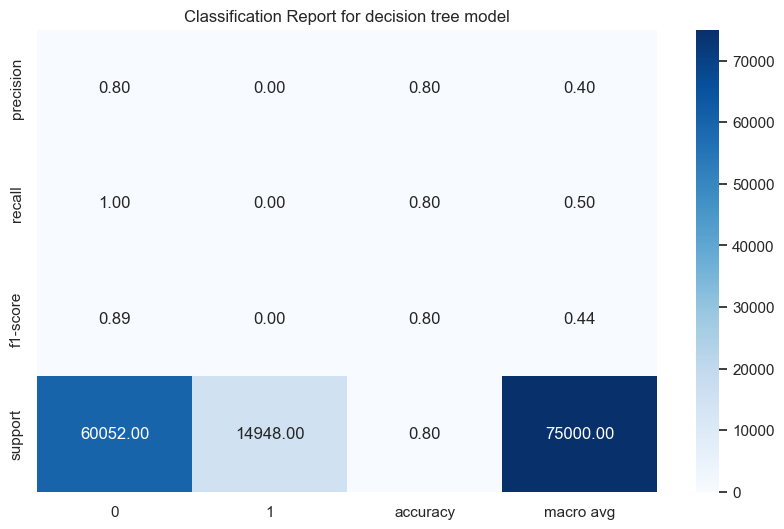

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'ecommerce_customer_data_custom_ratios.csv.zip'
data = pd.read_csv(file_path)

# Define the target variable and features
target_column = 'Churn'
features = data.drop(columns=[target_column, 'Customer ID', 'Customer Name', 'Purchase Date'])

# Handle categorical variables using Label Encoding or One-Hot Encoding
for column in features.select_dtypes(include=['object']).columns:
    if features[column].nunique() <= 10:  # If low unique values, one-hot encoding
        features = pd.get_dummies(features, columns=[column], drop_first=True)
    else:  # Label encoding for higher cardinality
        features[column] = LabelEncoder().fit_transform(features[column])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, data[target_column], test_size=0.3, random_state=42)

# Initialize and train the Decision Tree Classifier with limited depth
clf = DecisionTreeClassifier(random_state=42, max_depth=3)
clf.fit(X_train, y_train)

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=features.columns, class_names=["Not Churn", "Churn"], rounded=True)
plt.title("Decision Tree for E-commerce Customer Churn Prediction")
plt.show()

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of decision tree model:", accuracy*100)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Generate the classification report as a dictionary
report = classification_report(y_test, y_pred, output_dict=True)

# Convert the classification report into a DataFrame
report_df = pd.DataFrame(report).transpose()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :].T, annot=True, cmap="Blues", fmt=".2f") 
plt.title("Classification Report for decision tree model")
plt.show()




1)  Precision: Measures how accurate the model is when it predicts a class (Churn or Not Churn).
    High precision indicates that most of the predicted churned customers actually churned.
    For example, if the precision for "Churn" is high, it means fewer non-churners are incorrectly labeled as churners.
2)  Recall (Sensitivity): Measures how well the model identifies all actual churned customers.
    High recall for "Churn" means the model successfully captures most of the customers who truly churned.
    If recall is low, the model misses some churned customers, which could be costly for customer retention strategies.
3)  F1-score: A balance between precision and recall, indicating overall accuracy for each class.
    High F1-scores across both classes suggest a strong balance, while low F1-scores indicate trade-offs between precision and recall.
4)  Accuracy: Represents the overall correctness of the model’s predictions.
    While accuracy is a good baseline metric, it’s often less informative when class distributions are imbalanced.1.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

# Load the dataset
dataset = pd.read_csv('ecommerce_customer_data_custom_ratios.csv.zip')

# Preprocessing
# Replace 2 with 1 in the 'Churn' column
dataset['Churn'] = dataset['Churn'].replace(2, 1)
dataset['Churn'] = dataset['Churn'].astype(int)

# Drop non-numeric columns including 'Purchase Date', 'Customer ID', 'Customer Name'
X = dataset.drop(columns=['Customer ID', 'Customer Name', 'Purchase Date', 'Churn'], errors='ignore')

# If 'Purchase Date' exists, add 'Purchase Month'
if 'Purchase Date' in dataset.columns:
    dataset['Purchase Date'] = pd.to_datetime(dataset['Purchase Date'], errors='coerce')
    X['Purchase Month'] = dataset['Purchase Date'].dt.month.fillna(0).astype(int)

# One-hot encode categorical columns
X = pd.get_dummies(X, columns=['Product Category', 'Payment Method', 'Gender'], drop_first=True)
y = dataset['Churn']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the model
def create_model():
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
    model.add(Dropout(0.3))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    optimizer = Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Initialize and train the model
model = create_model()
history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=50, batch_size=32, verbose=1)

# Evaluate accuracy on the training set
y_train_pred_prob = model.predict(X_train_scaled) > 0.5
train_accuracy = accuracy_score(y_train, y_train_pred_prob)
print(f"Training Accuracy: {train_accuracy:.4f}")

# Evaluate accuracy on the test set
y_test_pred_prob = model.predict(X_test_scaled) > 0.5
test_accuracy = accuracy_score(y_test, y_test_pred_prob)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Classification report
print("Classification Report:\n", classification_report(y_test, y_test_pred_prob))

# Plotting training and validation accuracy over epochs
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

# ROC Curve
y_test_pred_prob = model.predict(X_test_scaled).ravel()  # Get probabilities for ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


C:\Users\sheet\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
4375/4375 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7992 - loss: 0.5177 - val_accuracy: 0.7998 - val_loss: 0.5011
Epoch 2/50
4375/4375 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.8005 - loss: 0.5002 - val_accuracy: 0.7998 - val_loss: 0.5011
Epoch 3/50
4375/4375 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8014 - loss: 0.4987 - val_accuracy: 0.7998 - val_loss: 0.5007
Epoch 4/50
4375/4375 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8008 - loss: 0.4995 - val_accuracy: 0.7998 - val_loss: 0.5007
Epoch 5/50
4375/4375 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.8011 - loss: 0.4990 - val_accuracy: 0.7998 - val_loss: 0.5007
Epoch 6/50
4375/4375 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.8007 - loss: 0.4995 - val_accuracy: 0.7998 - val_loss: 0.5009
Epoch 7/50
4375/4375 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8023 - loss: 0.4973 - val_accuracy: 0.7998 - val_loss: 0.5007
Epoch 8/50
4375/4375 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8013 - loss: 0.4988